Universidad Galileo

Statistical Learning II

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

## Práctica No. 2

### PCA y t-SNE

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Selección del Conjunto de Datos

In [3]:
imagenes_entrenamiento = train_images
etiquetas_entrenamiento = train_labels

# Forma original del Set de Entrenamiento
filas,longitud,altura = np.shape(imagenes_entrenamiento)

# Cambio de forma matriz características a vector características (flatten)
dataset = np.reshape(imagenes_entrenamiento,(filas,longitud*altura))

In [4]:
np.shape(dataset)

(60000, 784)


Para esta práctica, se solicitó reducir a 2 componentes, pero se dejó libertad de hacerlo a 3 para experimentar. Para ello se implementaron funciones para PCA y t-SNE con un valor "k" como parámetro que indica el número de componentes deseado.

### PCA: Principal Component Analysis

#### Función para cálculo de Sigma: Matriz de Covarianza

In [5]:
def covarianza(x):
    media = np.mean(x)
    desviacion_estandar = np.std(x)    
    x_norm = (x - media) / desviacion_estandar
    sigma = np.cov(x_norm,rowvar=False) # Importante: Las features son columnas
    
    return sigma

In [6]:
def PCA(X,k):
    
    # Función para Estándarización y el Cálculo de Sigma
    sigma = covarianza(X)
    
    # SVD para Obtener Vectores Propios (U) y Valores Propios (S)
    U,S,Vh = np.linalg.svd(sigma,full_matrices=True)
    
    # Varianza Preservada
    varianza_total = np.sum(S)
    varianza_preservada = np.sum(S[:k])
    porcentaje_varianza_preservada = (varianza_preservada / varianza_total)*100
    
    
    print("Varianza Total:",np.around(varianza_total,2))
    print("Varianza_preservada:",np.around(varianza_preservada,2))
    print("Información Preservada:",np.around(porcentaje_varianza_preservada,2),"%")
    
    # Reducción de Dimensionalidad
    X_reducida = np.matmul(X,U[:,:k]) # Primeras k columnas para k componentes principales
    print("Reducción de Dimensionalidad de:",np.shape(X)[1]," a ",np.shape(X_reducida)[1])
    
    return X_reducida

In [7]:
dataset_reducido_PCA = PCA(dataset,3)

Varianza Total: 547.38
Varianza_preservada: 289.09
Información Preservada: 52.81 %
Reducción de Dimensionalidad de: 784  a  3


### t-SNE

In [8]:
def tSNE(X,k):
    
    X_reducida = TSNE(n_components=k).fit_transform(X)
    
    return X_reducida

**Nota**: Se pudo observar que t-SNE tiene un mayor tiempo de procesamiento que el algoritmo de PCA. Para poder facilitar el ejercicio, se ha tomado un subconjunto del conjunto de entrenamiento. Se seleccionaron 10,000 muestras para poder realizar la práctica, aunque puede utilizarse el conjunto completo de las 60,000 muestras si se tiene el tiempo y recursos computacionales.

In [9]:
dataset_reducido_tSNE = tSNE(dataset[:10000],3)

In [10]:
np.shape(dataset_reducido_tSNE)

(10000, 3)

#### Análisis de Representaciones PCA vrs. tSNE
- La primera diferencia que se identificó es el tiempo de procesamiento. En definitiva, el **t-SNE** necesita mucho más tiempo de procesamiento para el mismo número de muestras que **PCA**. Por este motivo, para esta práctica, se redujo el tamaño del set de entrenamiento para tSNE de forma de poder reducir este tiempo. Se encontró información que de hecho se recomienda aplicar una primera etapa de reducción utilizando **PCA** a una dimensión intermedia (por ejemplo 50) y luego utilizar **t-SNE** para terminar de reducir a las dimensiones finales.
- La segunda diferencia es que el espacio al que se mapean las observaciones es distinto. Por ende el rango de las componentes principales que se identifican es distinto entre ambos métodos (ver comparativa gráfica al final del notebook).
- Lo que sí se puede observar es que **t-SNE** parece dar una mejor definición de clusters (ver comparativa gráfica al final del notebook) que **PCA**. 

Se podría proponer la utilización conjunta de ambos algoritmos: una etapa inicial con **PCA** para reducir a una dimensionalidad intermedia, y luego afinar con **t-SNE** para lograr una mejor definición de clusters.


## Clustering
Se utilizará la función K-Means de sklearn.

In [11]:
def kmeans(X,k):
    modelo = KMeans(n_clusters=k, random_state=0).fit(X)
    return modelo

#### Clustering del Modelo PCA
Utilizamos un modelo de hard-clustering con K-Means, para k = 10, ya que es el número de etiquetas del conjunto de datos Fashion MNIST

In [12]:
modelo_clustering_PCA=kmeans(dataset_reducido_PCA,10)

#### Clustering del Modelo t-SNE
Utilizamos igualmente K-Means, con k = 10.

In [13]:
modelo_clustering_tSNE=kmeans(dataset_reducido_tSNE,10)

### Función de Análisis Gráfico de Clustering

In [14]:
def visualizacion(x_reducido,labels_cluster,labels_original):
    
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(121, projection='3d')

    x=x_reducido[:,0]
    y=x_reducido[:,1]
    z=x_reducido[:,2]

    ax.title.set_text('X_Reducido')
    ax.scatter(x, y, z, c=labels_cluster.labels_, cmap = 'viridis',marker='o')

    ax.set_xlabel('PC No. 1')
    ax.set_ylabel('PC No. 2')
    ax.set_zlabel('PC No. 3')


    ax = fig.add_subplot(122, projection='3d')

    x=x_reducido[:,0]
    y=x_reducido[:,1]
    z=x_reducido[:,2]

    ax.title.set_text('Original')
    ax.scatter(x, y, z, c=labels_original, cmap = 'inferno',marker='o')


    ax.set_xlabel('PC No. 1')
    ax.set_ylabel('PC No. 2')
    ax.set_zlabel('PC No. 3')

    plt.show()
    
    return 0
    

#### Comparativa Gráfica Clustering PCA vrs. Etiquetas Originales 

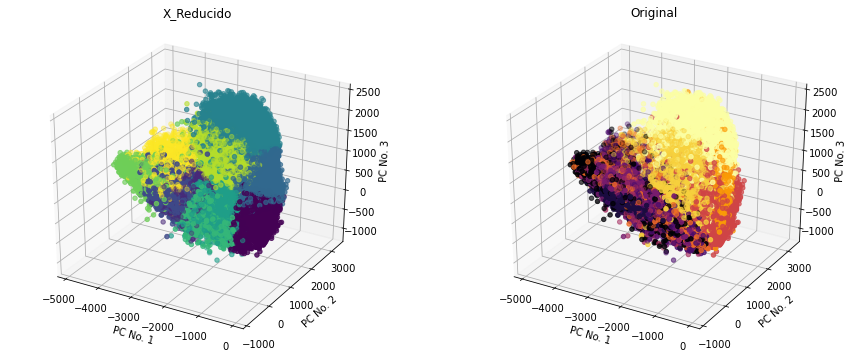

0

In [15]:
visualizacion(dataset_reducido_PCA,modelo_clustering_PCA,etiquetas_entrenamiento)

#### Comparativa Gráfica Clustering tSNE vrs. Etiquetas Originales 

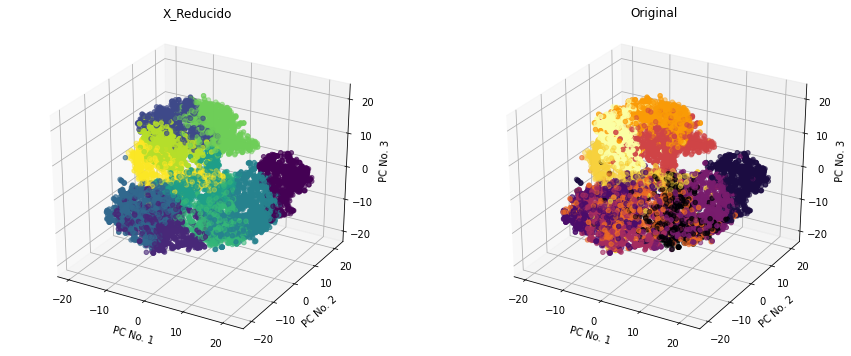

0

In [16]:
visualizacion(dataset_reducido_tSNE,modelo_clustering_tSNE,etiquetas_entrenamiento[:10000])

#### Conclusiones sobre desempeño de los métodos
Ambos métodos preservan la suficiente información para que se puedan identificar de buena manera las clases (en este caso, los tipos de prenda) de manera adecuada. Esto es sorprendente tomando en consideración que se redujo de 784 dimensiones a únicamente 3. En definitiva estas herramientas ayudan mucho a:
- Permitir una representación gráfica (2D o 3D) de los datos y así poder visualmente identificar relaciones y posibles clústers en datos que tienen una alta dimensionalidad (no observable).
- Esto queda demostrado comparando las clases originales (que en este caso se tenían en las etiquetas del dataset) con los clusters identificados sobre el conjunto de datos con dimensionalidad reducida. En general, se preserva una sorprendente cantidad de información considerando la inmensa cantidad de dimensiones que se reducen.

### Comparativa Gráfica PCA vs. tSNE

Como se explicó con anterioridad, fue necesario reducir el número de observaciones para el algoritmo de tSNE. Por lo que para comparar calcularemos PCA sobre el mismo dataset reducido y poder hacer la comparativa

In [18]:
dataset_reducido_10K_PCA = PCA(dataset[:10000],3)

Varianza Total: 546.6
Varianza_preservada: 289.85
Información Preservada: 53.03 %
Reducción de Dimensionalidad de: 784  a  3


#### Clustering PCA y tSNE

In [19]:
modelo_clustering_PCA_10K=kmeans(dataset_reducido_10K_PCA,10)

In [20]:
modelo_clustering_tSNE

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [21]:
def comparativa(x_reducido_PCA_10k,x_reducido_tSNE,labels_cluster_PCA,labels_cluster_tSNE):
    
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(121, projection='3d')

    x=x_reducido_PCA_10k[:,0]
    y=x_reducido_PCA_10k[:,1]
    z=x_reducido_PCA_10k[:,2]

    ax.title.set_text('PCA')
    ax.scatter(x, y, z, c=labels_cluster_PCA, cmap = 'viridis',marker='o')

    ax.set_xlabel('PC No. 1')
    ax.set_ylabel('PC No. 2')
    ax.set_zlabel('PC No. 3')


    ax = fig.add_subplot(122, projection='3d')

    x=x_reducido_tSNE[:,0]
    y=x_reducido_tSNE[:,1]
    z=x_reducido_tSNE[:,2]

    ax.title.set_text('tSNE')
    ax.scatter(x, y, z, c=labels_cluster_tSNE, cmap = 'inferno',marker='o')


    ax.set_xlabel('PC No. 1')
    ax.set_ylabel('PC No. 2')
    ax.set_zlabel('PC No. 3')

    plt.show()
    
    return 0
    

Ahora se mostrará la comparativa gráfica entre ambos métodos:

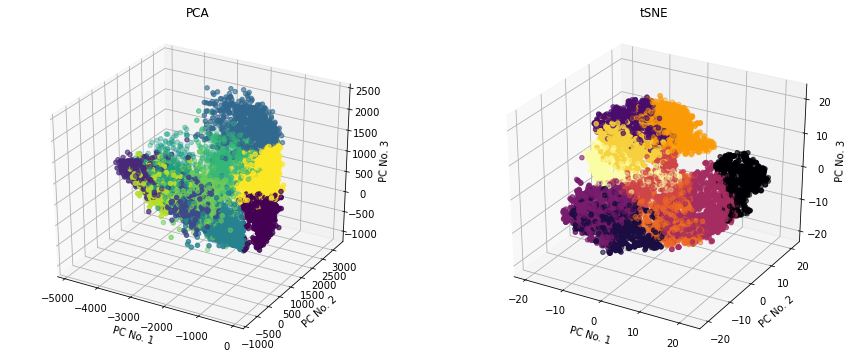

0

In [22]:
comparativa(dataset_reducido_10K_PCA,dataset_reducido_tSNE,modelo_clustering_PCA_10K.labels_,modelo_clustering_tSNE.labels_)

Como se mencionó con anterioridad, los espacios son distintos, sin embargo en t-SNE pueden observarse ciertas separaciones que permitirían identificar de mejor forma las posibles agrupaciones (mejor definición).